<a href="https://colab.research.google.com/github/Principiante-en-Programacion-G8-ONE/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes/blob/main/TelecomX_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importaciones**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
url_datos = 'https://raw.githubusercontent.com/Principiante-en-Programacion-G8-ONE/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes/refs/heads/main/TelecomX_Data.json'

#📌 Extracción

In [12]:
# Importacion de datos
datos = pd.read_json(url_datos)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [13]:
# Normalizacion de datos
datos_normalizados = pd.concat([
    datos.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(datos['customer']),
    pd.json_normalize(datos['phone']),
    pd.json_normalize(datos['internet']),
    pd.json_normalize(datos['account'])
], axis=1)
datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [14]:
# validacion de los tipos de datos
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [15]:
# Columnas y registros
print(f"\nCantidad de registros: {datos_normalizados.shape[0]}")
print(f"Cantidad de columnas: {datos_normalizados.shape[1]}")


Cantidad de registros: 7267
Cantidad de columnas: 21


In [16]:
# extraccion ded columnas relevantes
columnas_relevantes = [
    'customerID',
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Charges.Monthly',
    'Charges.Total'
]

datos_churn = datos_normalizados[columnas_relevantes]
datos_churn.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
# Inconsistencias en variables
categorical_cols = datos_churn.columns
for col in categorical_cols:
    print(f"\nValores únicos en '{col}' ({len(datos_churn[col].unique())}): {datos_churn[col].unique()}")
    valores = datos_churn[col].astype(str).str.strip().unique()
    if len(valores) != len(datos_churn[col].unique()):
        print(f"  Atención: posibles inconsistencias de espacios en '{col}'")


Valores únicos en 'customerID' (7267): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn' (3): ['No' 'Yes' '']

Valores únicos en 'gender' (2): ['Female' 'Male']

Valores únicos en 'SeniorCitizen' (2): [0 1]

Valores únicos en 'Partner' (2): ['Yes' 'No']

Valores únicos en 'Dependents' (2): ['Yes' 'No']

Valores únicos en 'tenure' (73): [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en 'PhoneService' (2): ['Yes' 'No']

Valores únicos en 'MultipleLines' (3): ['No' 'Yes' 'No phone service']

Valores únicos en 'InternetService' (3): ['DSL' 'Fiber optic' 'No']

Valores únicos en 'OnlineSecurity' (3): ['No' 'Yes' 'No internet service']

Valores únicos en 'OnlineBackup' (3): ['Yes' 'No' 'No internet service']

Valores únicos en 'DeviceProtec

In [18]:
#  Reemplazar por 'No' las filas que tienen 'No internet service' y 'No phone service'
cols_servicios = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_servicios:
    datos_churn[col] = datos_churn[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [19]:
# Validar registros vacios en churn
print(f"Registros con 'Churn' vacío: {(datos_churn['Churn'] == '').sum()}")

Registros con 'Churn' vacío: 224


In [20]:
#  Reemplazar '' por 'No'
datos_churn['Churn'] = datos_churn['Churn'].replace('', 'No')

In [21]:
#Duplicados
duplicados = datos_churn.duplicated().sum()
duplicados

np.int64(0)

In [22]:
# Valores unicos despues de limpieza
categorical_cols = datos_churn.columns
for col in categorical_cols:
    print(f"\nValores únicos en '{col}' ({len(datos_churn[col].unique())}): {datos_churn[col].unique()}")
    valores = datos_churn[col].astype(str).str.strip().unique()
    if len(valores) != len(datos_churn[col].unique()):
        print(f"  Atención: posibles inconsistencias de espacios en '{col}'")


Valores únicos en 'customerID' (7267): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn' (2): ['No' 'Yes']

Valores únicos en 'gender' (2): ['Female' 'Male']

Valores únicos en 'SeniorCitizen' (2): [0 1]

Valores únicos en 'Partner' (2): ['Yes' 'No']

Valores únicos en 'Dependents' (2): ['Yes' 'No']

Valores únicos en 'tenure' (73): [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en 'PhoneService' (2): ['Yes' 'No']

Valores únicos en 'MultipleLines' (2): ['No' 'Yes']

Valores únicos en 'InternetService' (3): ['DSL' 'Fiber optic' 'No']

Valores únicos en 'OnlineSecurity' (2): ['No' 'Yes']

Valores únicos en 'OnlineBackup' (2): ['Yes' 'No']

Valores únicos en 'DeviceProtection' (2): ['No' 'Yes']

Valores únicos en 'TechSupport' (2): ['Ye

In [23]:
## Conversion de tipo de dato
df = datos_churn.copy()
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Monthly'] = df['Charges.Monthly'].astype(float)
df['tenure'] = df['tenure'].astype(int)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
             'StreamingMovies', 'PaperlessBilling']

categoricas = [
    'gender', 'InternetService',  'Contract', 'PaymentMethod'
]
for col in categoricas:
    df[col] = df[col].astype('category')

df[cols_binarias] = df[cols_binarias].apply(lambda col: col.map({'Yes': 1, 'No': 0}).astype('int64'))

In [24]:
# se verifica si existen valores nulos en las columnas
print(f"Valores nulos en Charges.Total: {df['Charges.Total'].isna().sum()}")

Valores nulos en Charges.Total: 11


In [25]:
# Se eliminan los valores nulos
df.dropna(subset=['Charges.Total'], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   int64   
 2   gender            7256 non-null   category
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null   int64   
 5   Dependents        7256 non-null   int64   
 6   tenure            7256 non-null   int64   
 7   PhoneService      7256 non-null   int64   
 8   MultipleLines     7256 non-null   int64   
 9   InternetService   7256 non-null   category
 10  OnlineSecurity    7256 non-null   int64   
 11  OnlineBackup      7256 non-null   int64   
 12  DeviceProtection  7256 non-null   int64   
 13  TechSupport       7256 non-null   int64   
 14  StreamingTV       7256 non-null   int64   
 15  StreamingMovies   7256 non-null   int64   
 16  Contract          7256 non-nu

In [27]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [28]:
# Gasto promedio diario basado en facturación mensual (asumiendo 30 días por mes)
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [29]:
# Gasto promedio diario acumulado desde el inicio del contrato
# Nota: tenure = meses de contrato, multiplicamos por 30 días para obtener días totales
tenure_dias = df['tenure'].replace(0, 1) * 30
df['Cuentas_Diarias_Acumulado'] = df['Charges.Total'] / tenure_dias

df[['Charges.Monthly', 'Cuentas_Diarias', 'Charges.Total', 'tenure', 'Cuentas_Diarias_Acumulado']].head()

,Charges.Monthly,Cuentas_Diarias,Charges.Total,tenure,Cuentas_Diarias_Acumulado
0,65.6,2.186667,593.30,9,2.197407
1,59.9,1.996667,542.40,9,2.008889
2,73.9,2.463333,280.85,4,2.340417
3,98.0,3.266667,1237.85,13,3.173974
4,83.9,2.796667,267.40,3,2.971111


In [30]:
# Diccionario para renombrar columnas
renombrar_cols = {
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'MultiplesLineas',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPeliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'FacturaElectronica',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'Cuentas_Diarias': 'GastoDiarioMensual',
    'Cuentas_Diarias_Acumulado': 'GastoDiarioAcumulado'
}
df.rename(columns=renombrar_cols, inplace=True)

# Convertir variables binarias Yes/No a 1/0
binarias = [
           'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico',
           'StreamingTV', 'StreamingPeliculas', 'FacturaElectronica']
booleaanas = ['Abandono', 'AdultoMayor', 'Pareja', 'Dependientes', 'ServicioTelefonico', 'MultiplesLineas', ]

In [31]:
df.head(2)

,ID_Cliente,Abandono,Genero,AdultoMayor,Pareja,Dependientes,Meses_Contrato,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,SoporteTecnico,StreamingTV,StreamingPeliculas,Contrato,FacturaElectronica,MetodoPago,CargoMensual,CargoTotal,GastoDiarioMensual,GastoDiarioAcumulado
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667,2.197407
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667,2.008889


In [32]:
# Se traducen los valores a español
df['Genero'] = df['Genero'].map({'Male': 'Masculino', 'Female': 'Femenino'})

df['Contrato'] = df['Contrato'].map({
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
})

In [33]:
# Se traducen los valores a español
df['MetodoPago'] = df['MetodoPago'].map({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automático)'
})

In [34]:
df['MetodoPago'].unique()

['Cheque enviado por correo', 'Cheque electrónico', 'Tarjeta de crédito (automático)', 'Transferencia bancaria (automático)']
Categories (4, object): ['Transferencia bancaria (automático)', 'Tarjeta de crédito (automático)', 'Cheque electrónico',
                         'Cheque enviado por correo']

In [35]:
df.head()

,ID_Cliente,Abandono,Genero,AdultoMayor,Pareja,Dependientes,Meses_Contrato,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,SoporteTecnico,StreamingTV,StreamingPeliculas,Contrato,FacturaElectronica,MetodoPago,CargoMensual,CargoTotal,GastoDiarioMensual,GastoDiarioAcumulado
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,1,1,0,Un año,1,Cheque enviado por correo,65.6,593.30,2.186667,2.197407
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,1,Mes a mes,0,Cheque enviado por correo,59.9,542.40,1.996667,2.008889
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.463333,2.340417
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.266667,3.173974
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,1,1,0,Mes a mes,1,Cheque enviado por correo,83.9,267.40,2.796667,2.971111


#📊 Carga y análisis

In [36]:
# Estadísticas descriptivas para variables numéricas
numericas = ['Meses_Contrato', 'CargoMensual', 'GastoDiarioMensual', 'GastoDiarioAcumulado']
df[numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
Meses_Contrato,7256.0,32.395535,24.558067,1.000000,9.000000,29.000000,55.000000,72.000000
CargoMensual,7256.0,64.755423,30.125739,18.250000,35.450000,70.300000,89.900000,118.750000
GastoDiarioMensual,7256.0,2.158514,1.004191,0.608333,1.181667,2.343333,2.996667,3.958333
GastoDiarioAcumulado,7256.0,2.158564,1.007442,0.459167,1.191667,2.341667,3.005985,4.046667


In [37]:
# Mediana
df[numericas].median()

,0
Meses_Contrato,29.000000
CargoMensual,70.300000
GastoDiarioMensual,2.343333
GastoDiarioAcumulado,2.341667


In [38]:
# Estadísticas para variables
categoricas = df.columns.tolist()
categoricas += ['Abandono']

for col in categoricas:
    print(f"Variable: {col} \n")
    print(df[col].value_counts(normalize=True, dropna=False).to_frame('Proporción'))
    print("=============================\n\n")

Variable: ID_Cliente 

            Proporción
ID_Cliente            
9995-HOTOH    0.000138
0002-ORFBO    0.000138
0003-MKNFE    0.000138
0004-TLHLJ    0.000138
0011-IGKFF    0.000138
...                ...
0018-NYROU    0.000138
0017-IUDMW    0.000138
0017-DINOC    0.000138
0016-QLJIS    0.000138
0015-UOCOJ    0.000138

[7256 rows x 1 columns]


Variable: Abandono 

          Proporción
Abandono            
0            0.74242
1            0.25758


Variable: Genero 

           Proporción
Genero               
Masculino     0.50565
Femenino      0.49435


Variable: AdultoMayor 

             Proporción
AdultoMayor            
0                0.8371
1                0.1629


Variable: Pareja 

        Proporción
Pareja            
0           0.5164
1           0.4836


Variable: Dependientes 

              Proporción
Dependientes            
0               0.700937
1               0.299063


Variable: Meses_Contrato 

                Proporción
Meses_Contrato            
1       

In [39]:
#  Gráfico de barras con Seaborn + Matplotlib
def grafico_barras_abandono():
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x='Abandono', hue='Abandono', palette='Set2', legend=False)
  plt.xticks([0,1], ['Permanecieron', 'Evadieron'])
  plt.title('Distribución de Clientes por Abandono')
  plt.ylabel('Número de Clientes')
  plt.xlabel('Estado de Abandono')
  return plt

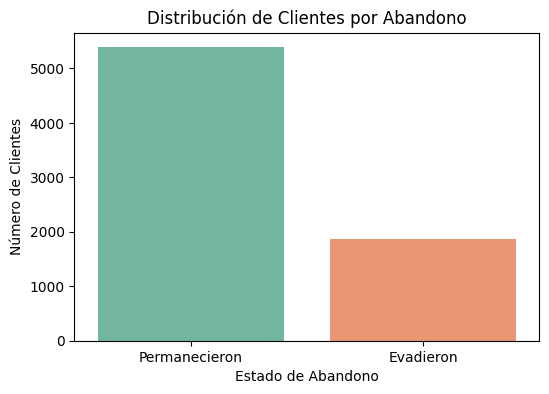

In [40]:
grafico_barras_abandono().show()

In [41]:
def grafico_pastel_abandono():
  labels = ['Permanecieron', 'Abandonaron']
  sizes = df['Abandono'].value_counts().sort_index()

  plt.figure(figsize=(6,6))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
  plt.title('Proporción de Clientes por Abandono')
  return plt

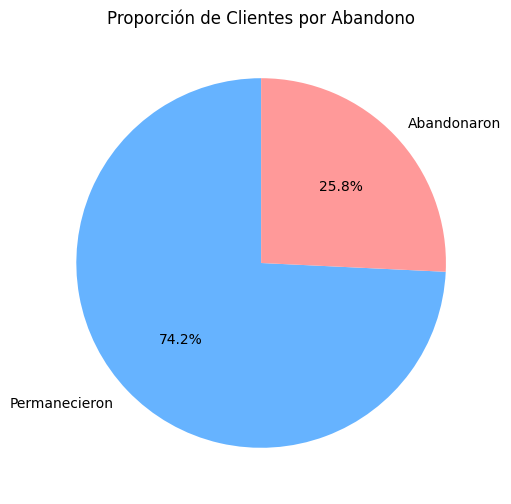

In [42]:
grafico_pastel_abandono().show()

In [43]:
# Se obtienen la categorias de interes para generar graficos
categoricas_interes = ['Genero', 'Contrato', 'MetodoPago', 'ServicioInternet', 'ServicioTelefonico', 'MultiplesLineas',
                       'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas']

for col in categoricas_interes:
    tabla = pd.crosstab(df[col], df['Abandono'], normalize='index')
    print(f"Distribución de Abandono según {col}:\n")
    print(tabla)
    print("=====================================================\n")

Distribución de Abandono según Genero:

Abandono          0         1
Genero                       
Femenino   0.738221  0.261779
Masculino  0.746525  0.253475

Distribución de Abandono según Contrato:

Abandono          0         1
Contrato                     
Mes a mes  0.586767  0.413233
Un año     0.890646  0.109354
Dos años   0.972302  0.027698

Distribución de Abandono según MetodoPago:

Abandono                                    0         1
MetodoPago                                             
Transferencia bancaria (automático)  0.837429  0.162571
Tarjeta de crédito (automático)      0.851946  0.148054
Cheque electrónico                   0.561963  0.438037
Cheque enviado por correo            0.814122  0.185878

Distribución de Abandono según ServicioInternet:

Abandono                 0         1
ServicioInternet                    
DSL               0.815143  0.184857
Fiber optic       0.594434  0.405566
No                0.928254  0.071746

Distribución de Abandono segú

In [44]:
# Se generan los graficos de las columnas de interes
def grafico_intractivo(categoricas_interes):
    map_abandono = {0: "Permanecieron", 1: "Abandonaron"}
    map_binario = {0: "No Contratado", 1: "Contratado"}
    map_adultomayor = {0: "No", 1: "Sí"}

    for col in categoricas_interes:
        if col == 'AdultoMayor':
            x_values = df[col].map(map_adultomayor)
            category_order = ["No", "Sí"]
        elif set(df[col].dropna().unique()) <= {0, 1}:
            x_values = df[col].map(map_binario)
            category_order = ["No Contratado", "Contratado"]
        else:
            x_values = df[col]
            category_order = sorted(df[col].unique())

        color_values = df['Abandono'].map(map_abandono)

        fig = px.histogram(
            x=x_values,
            color=color_values,
            barmode='stack',
            category_orders={"x": category_order},
            color_discrete_map={
                "Permanecieron": '#66b3ff',
                "Abandonaron": '#ff9999'
            },
            title=f'Abandono según {col}'
        )
        fig.update_layout(
            yaxis_title='Número de Clientes',
            xaxis_title=col,
            xaxis={'categoryorder': 'array', 'categoryarray': category_order}
        )
        fig.show()

In [45]:
grafico_intractivo(['Genero', 'Contrato', 'MetodoPago', 'ServicioInternet', 'ServicioTelefonico', 'MultiplesLineas',
                       'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas'])

In [46]:
# Generacion de graficos con Tipos de cargo
def grafico_tipo_cargo():
  map_abandono = {0: "Permanecieron", 1: "Abandonaron"}
  df['Estado Abandono'] = df['Abandono'].map(map_abandono)

  variables_numericas = [
      'CargoMensual', 'CargoTotal',
      'Meses_Contrato', 'GastoDiarioMensual',
      'GastoDiarioAcumulado'
  ]

  for var in variables_numericas:
    data_filtrada = df[[var, 'Estado Abandono']].dropna()

    plt.figure(figsize=(10,5))
    sns.kdeplot(
        data=data_filtrada,
        x=var,
        hue='Estado Abandono',
        common_norm=False,
        fill=True,
        alpha=0.5
        )
    plt.title(f'Distribución de {var} por estado de abandono', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.show()

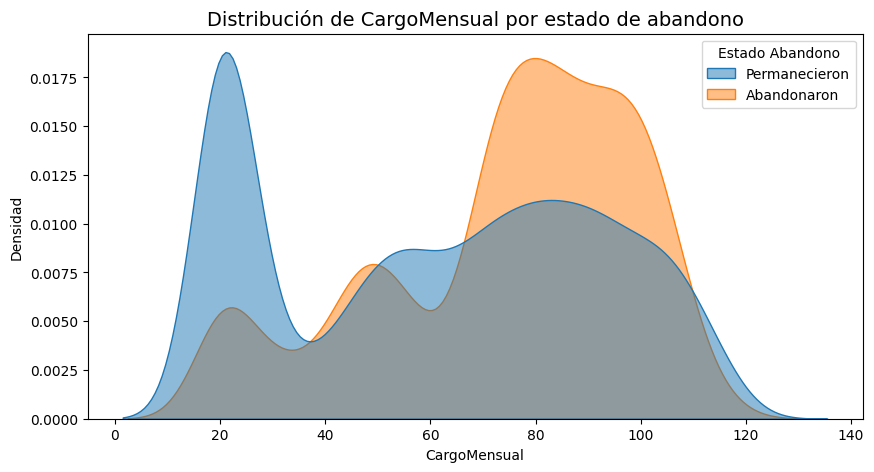

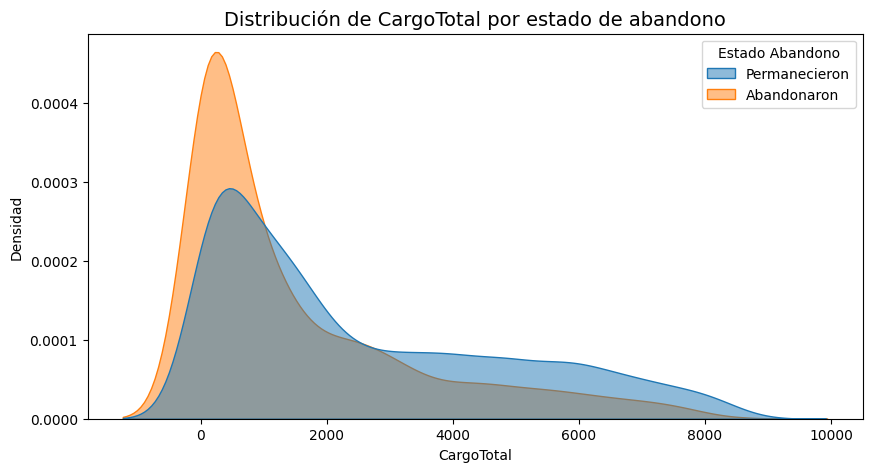

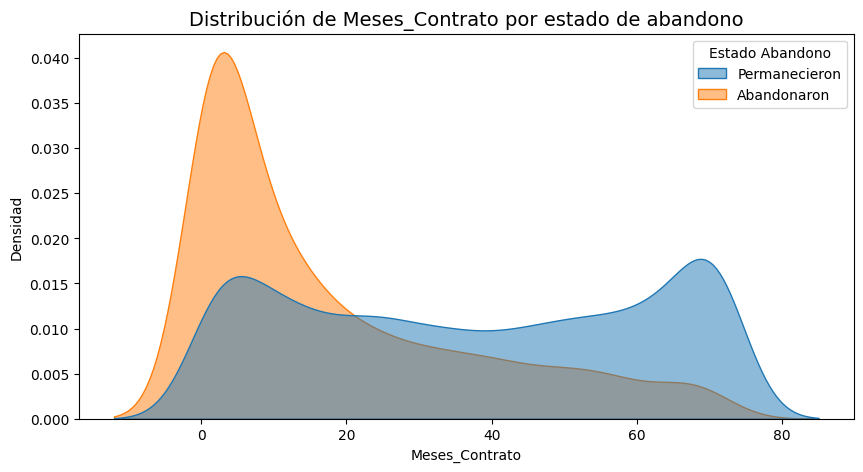

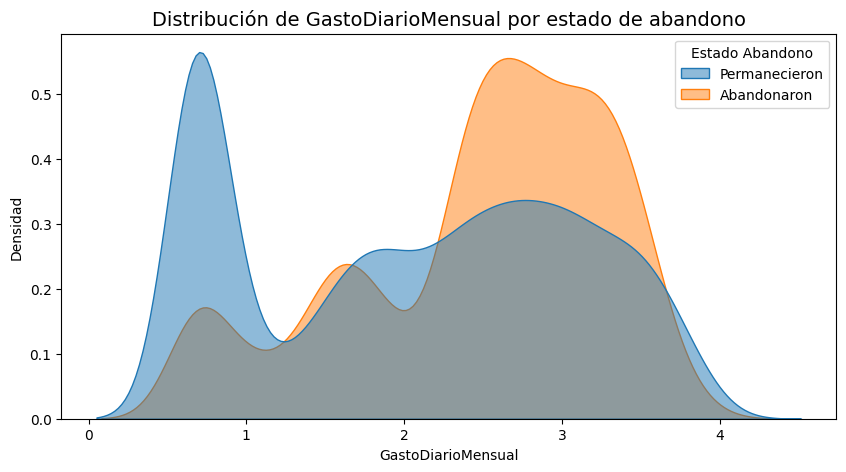

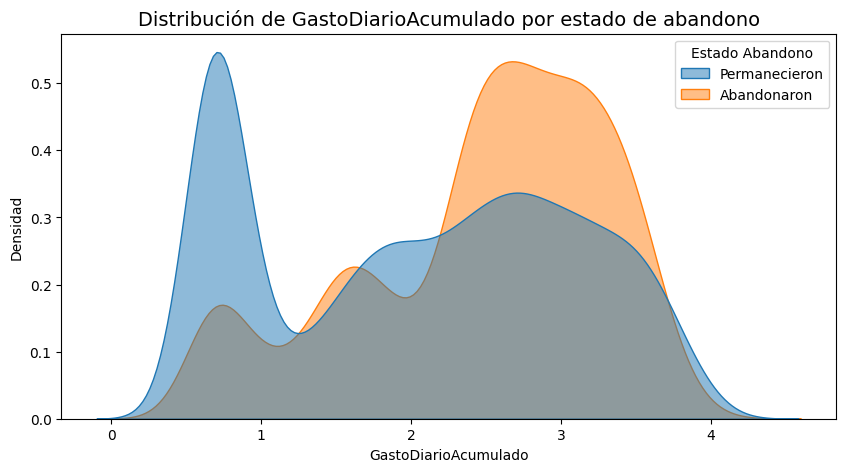

In [47]:
grafico_tipo_cargo()

#📄Informe final

## Introducción

El objetivo principal de este análisis es comprender los factores que influyen en la evasión de clientes dentro de Telecom Latam. La evasión de clientes ocurre cuando un usuario decide cancelar su contrato o cambiarse a la competencia, lo que impacta directamente en los ingresos y la rentabilidad.
El propósito del estudio es identificar patrones y características comunes entre los clientes que han abandonado la empresa, con el fin de implementar estrategias preventivas que reduzcan la tasa de evasión y aumente la retencion.

## Limpieza y tratamiento de datos

Para garantizar la calidad del análisi, se realizaron los siguientes pasos:


---


1. Importación de datos
* Los datos se importaron directamente desde un repositorio de HitHub mediante una URL.
* El archivo estaba en formato JSON, por lo que se realizo un proceso de normalización para estructurarlo en un DataFrame.


---


2. Revisión incial y selección de columnas relevantes
*   Uso de `info()` para identificar cantidad de registros, columnas y tipo de datos inciales (todos ebn formato `object`).
*   Se seleccionaron únicamnete las variables necesarias para el análisis.


---


3. Conversión de tipos de datos
*   Tranformación de columnas a su tupo de dato correcto (`int`, `float`, `bool`) para optimizar cáculos.


---


4. Tratamiento de valores nulos vacíos
*   Visualización de valores nulos.
*   Eliminación de registros incompletos.
*   Revisión y sustitución de valos vacíos (`''`) poe un valor segun el contexto, como `No`.


---


5. Estandarización y consistencia de valores
*   Normalización de categorías con variaciones textuales (ejemplo: `"No phone service` → `No`).
*   Revisión de valores únicos en cada columna para eliminar inconsistencias.
*   Conversión de variables categóricas binarias (`YES/NO`) a valores (`1/0`).


---


6. Revisión de duplicados
*   Validación de registros únicos para evitar sesgos en el análiss.


---


7. Ajustes  adicionales
*   Renombrado de columnas para mayor legibilidad para personas no técnicas.
*   Traducción de nombres de columnas y categorías al español.
*   Cálculo de cuentas diarias y cuentas diarias acumuladas para identificar tendencias temporales.

## Análisis Exploratorio de datos

El análisis exploratorio se centró en identificar patrones y relaciones entre las variables y la evasión de clientes:

#### Distribución del churn: proporción de clientes que cancelaron frente a los que permanecieron

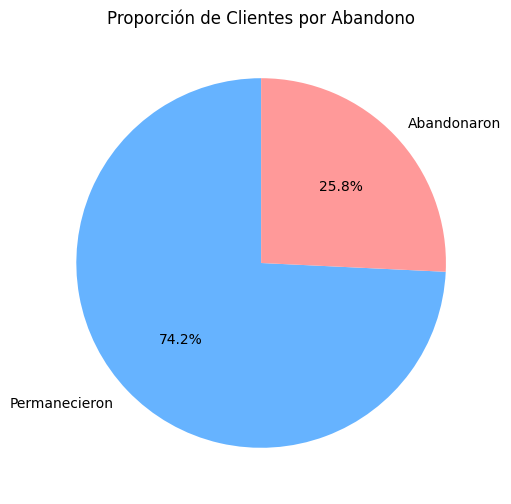

In [48]:
grafico_pastel_abandono().show()

#### Relación entre Abandono y servicios contratado
Visualización de tasas de abandono según servicios

In [49]:
grafico_intractivo(['ServicioInternet', 'ServicioTelefonico', 'MultiplesLineas', 'RespaldoOnline',
                    'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas', 'SeguridadOnline',
                    'ProteccionDispositivo'])

#### Análisis por antigüedad del cliente: tendencia de cancelaciones según el tiempo como cliente.

In [50]:
grafico_intractivo(['Contrato'])

#### Impacto de métodos de pago: cómo influye el medio de pago en la permanencia.

In [51]:
grafico_intractivo(['MetodoPago'])

#### Impacto del genero y adultos mayores

In [52]:
grafico_intractivo(['Genero', 'AdultoMayor'])

Estas visualizaciones permitieron identifica sefmentos de clientes más propensos a abandonar, así como variables con mayor correlación con el churn.

### Conclusiones e Insights

* El abandono es mas alta en clientes con contratos mensuales, sin servicios adicionales.
* Los clientes adultos mayores tienen una menor tasa de evasión en comparación con los más jóvenes.
* Un cargo mensual elevado sin beneficio adicionales percibidos incrementa la probabilidad de cancelación.
* Los servicios de valor agregado como `SeguidadOnline` y `SoporteTecnico` parecen estar asociados con mayor fidelidad.


## Recomendaciones estratégicas

1. **Incentivar contratos a largo plazo**

Ofrecer descuentos o beneficios adicionales para clientes que migren de contrato mensual a anual o bianual.

2. **Paquetes de servicios personalizados**

Combinar ServicioInternet con servicios de seguridad, respaldo o soporte técnico para aumentar el valor percibido.

3. **Programas de fidelización temprana**

Atender a los clientes nuevos durante los primeros 6 meses para reducir el riesgo de cancelación.

4. **Segmentación de clientes en riesgo**

Implementar un modelo predictivo que identifique clientes con alto riesgo de evasión y aplicar campañas preventivas.

5. **Revisión de precios**

Ajustar el CargoMensual para que sea competitivo, especialmente para clientes con pocos servicios contratados.